# Assignment 4 : Pandas for data processing

Import all the required libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt   # For visualization

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')

Create nba.csv file and load the data into the file

In [2]:
fp = 'data/bos_basebl.csv'

Extract data from the HTML page and load it into the table variable using the read_html function

In [6]:
tables = pd.read_html("http://www.basketball-reference.com/leagues/NBA_2016_games.html")

In [7]:
games = tables[0]

In [9]:
games.to_csv(fp)  # Write data to CSV file (bos_basebl.csv)

In [10]:
games.shape  # get the dimentions of the data frame

(38, 9)

In [192]:
games.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,,.1,Notes
0,"Tue, Oct 27, 2015",8:00 pm,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,NaN
1,"Tue, Oct 27, 2015",8:00 pm,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,NaN
2,"Tue, Oct 27, 2015",10:30 pm,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,NaN
3,"Wed, Oct 28, 2015",7:30 pm,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,NaN
4,"Wed, Oct 28, 2015",7:30 pm,Chicago Bulls,115,Brooklyn Nets,100,Box Score,NaN,NaN


In [193]:
#Creating/renaming the header for the columns of the data frame

column_names = {'Date': 'date', 'Start (ET)': 'start',
                'Unamed: 2': 'box', 'Visitor/Neutral': 'away_team', 
                'PTS': 'away_points', 'Home/Neutral': 'home_team',
                'PTS.1': 'home_points', 'Unamed: 7': 'n_ot'}


# Converting the data format from (Tue, Oct 27, 2015) to s 2015-10-27 
#selecting only reuired columns
#Dropping rows with 4 or more than NA values
#Setting index to game date
games = (games.rename(columns=column_names)
    .dropna(thresh=4)
    [['date', 'away_team', 'away_points', 'home_team', 'home_points']]
    .assign(date=lambda x: pd.to_datetime(x['date'], format='%a, %b %d, %Y'))
    .set_index('date', append=True)
    .rename_axis(["game_id", "date"])
    .sort_index())
games.head()

,,away_team,away_points,home_team,home_points
game_id,date,,,,
0,2015-10-27,Detroit Pistons,106,Atlanta Hawks,94
1,2015-10-27,Cleveland Cavaliers,95,Chicago Bulls,97
2,2015-10-27,New Orleans Pelicans,95,Golden State Warriors,111
3,2015-10-28,Philadelphia 76ers,95,Boston Celtics,112
4,2015-10-28,Chicago Bulls,115,Brooklyn Nets,100


In [194]:
games.shape

(38, 4)

In [195]:
list(games)

['away_team', 'away_points', 'home_team', 'home_points']

 Question: How many days of rest did each team get between each game?
 to get this we need to seperate data with respect to each team such we get game date of every team i.e. home team and away team

In [196]:
#seperate each row into 2 to get home team game date and away team game date and keep the game_id index intact
tidy = pd.melt(games.reset_index(),
               id_vars=['game_id', 'date'], value_vars=['away_team', 'home_team'],
               value_name='team')
tidy.head(50)


,game_id,date,variable,team
0,0,2015-10-27,away_team,Detroit Pistons
1,1,2015-10-27,away_team,Cleveland Cavaliers
2,2,2015-10-27,away_team,New Orleans Pelicans
3,3,2015-10-28,away_team,Philadelphia 76ers
4,4,2015-10-28,away_team,Chicago Bulls
...,...,...,...,...
45,7,2015-10-28,home_team,Los Angeles Lakers
46,8,2015-10-28,home_team,Memphis Grizzlies
47,9,2015-10-28,home_team,Miami Heat
48,10,2015-10-28,home_team,Milwaukee Bucks


In [197]:
tidy.shape # thus we split each raw into tow to get home and away team match dates to get team level information

(76, 4)

In [198]:
tidy.head(50)

,game_id,date,variable,team
0,0,2015-10-27,away_team,Detroit Pistons
1,1,2015-10-27,away_team,Cleveland Cavaliers
2,2,2015-10-27,away_team,New Orleans Pelicans
3,3,2015-10-28,away_team,Philadelphia 76ers
4,4,2015-10-28,away_team,Chicago Bulls
...,...,...,...,...
45,7,2015-10-28,home_team,Los Angeles Lakers
46,8,2015-10-28,home_team,Memphis Grizzlies
47,9,2015-10-28,home_team,Miami Heat
48,10,2015-10-28,home_team,Milwaukee Bucks


In [199]:
# to get the number of days between games, aggregate data team and date and get the difference
# For each team... get number of days between games
tidy['rest'] = tidy.sort_values('date').groupby('team').date.diff().dt.days - 1
tidy.dropna().head(50)
#from the result "Los Angeles Lakers","	Brooklyn Nets", etc has one or more than one day of rest between games

,game_id,date,variable,team,rest
4,4,2015-10-28,away_team,Chicago Bulls,0.0
8,8,2015-10-28,away_team,Cleveland Cavaliers,0.0
14,14,2015-10-28,away_team,New Orleans Pelicans,0.0
17,17,2015-10-29,away_team,Memphis Grizzlies,0.0
18,18,2015-10-29,away_team,Dallas Mavericks,0.0
...,...,...,...,...,...
71,33,2015-10-31,home_team,Los Angeles Clippers,1.0
72,34,2015-10-31,home_team,Memphis Grizzlies,1.0
73,35,2015-10-31,home_team,New Orleans Pelicans,2.0
74,36,2015-10-31,home_team,Portland Trail Blazers,0.0


In [200]:
# thus reshapping the team rest days based on each row for away team and home team
# here used index of the original record to  merge the spitted records from the tidy data set to create df data set ie game level data with away and home rest.

by_game = (pd.pivot_table(tidy, values='rest',
                          index=['game_id', 'date'],
                          columns='variable')
             .rename(columns={'away_team': 'away_rest',
                              'home_team': 'home_rest'}))
df = pd.concat([games, by_game], axis=1)
df.dropna().head(20)

,,away_team,away_points,home_team,home_points,away_rest,home_rest
game_id,date,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0
...,...,...,...,...,...,...,...
32,2015-10-31,Utah Jazz,97,Indiana Pacers,76,0.0,1.0
33,2015-10-31,Sacramento Kings,109,Los Angeles Clippers,114,0.0,1.0
34,2015-10-31,Brooklyn Nets,91,Memphis Grizzlies,101,0.0,1.0


In [201]:
df.shape

(38, 6)

In [202]:
list(tidy)

['game_id', 'date', 'variable', 'team', 'rest']

In [203]:
sns.set(style='ticks', context='paper')

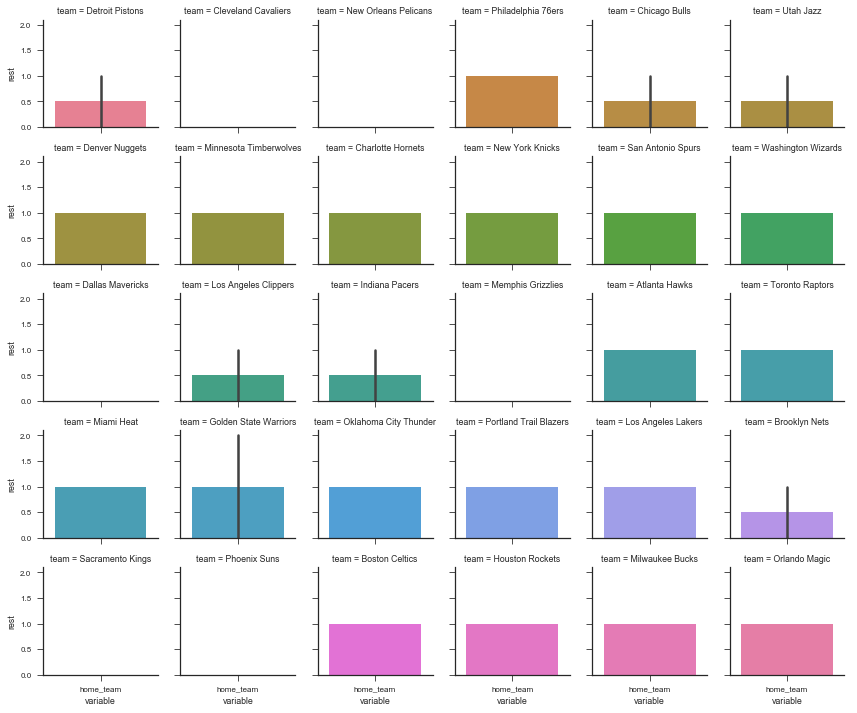

In [204]:
g = sns.FacetGrid(tidy, col='team', col_wrap=6, hue='team', size=2)
g.map(sns.barplot, 'variable', 'rest');

# here created the chart mentioning the number of day each team got rest before the match at home as well on the road using the data data set .

To calculate the winning difference with respect to home rest and away rest
Thus below are the teams with home rest true and with number of days rest count

In [205]:
df['home_win'] = df['home_points'] > df['away_points']  # adding home win column to df indicating win as true or false
df['rest_spread'] = df['home_rest'] - df['away_rest']   # adding home rest and away rest days
df.dropna().head(30)

,,away_team,away_points,home_team,home_points,away_rest,home_rest,home_win,rest_spread
game_id,date,,,,,,,,
17,2015-10-29,Memphis Grizzlies,112,Indiana Pacers,103,0.0,0.0,False,0.0
18,2015-10-29,Dallas Mavericks,88,Los Angeles Clippers,104,0.0,0.0,True,0.0
19,2015-10-29,Atlanta Hawks,112,New York Knicks,101,1.0,0.0,False,-1.0
20,2015-10-30,Charlotte Hornets,94,Atlanta Hawks,97,1.0,0.0,True,-1.0
21,2015-10-30,Toronto Raptors,113,Boston Celtics,103,1.0,1.0,False,0.0
...,...,...,...,...,...,...,...,...,...
33,2015-10-31,Sacramento Kings,109,Los Angeles Clippers,114,0.0,1.0,True,1.0
34,2015-10-31,Brooklyn Nets,91,Memphis Grizzlies,101,0.0,1.0,True,1.0
35,2015-10-31,Golden State Warriors,134,New Orleans Pelicans,120,0.0,2.0,False,2.0


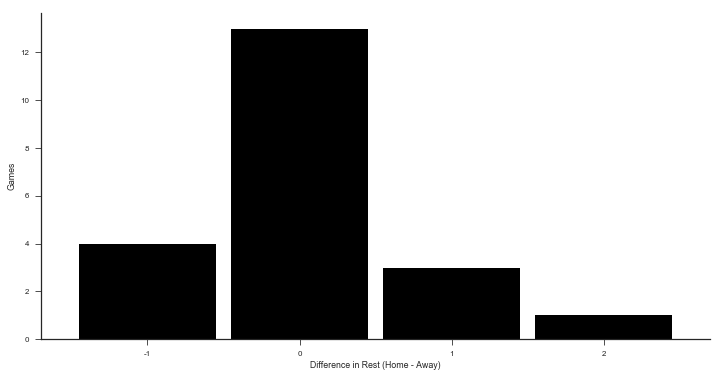

In [206]:
delta = (by_game.home_rest - by_game.away_rest).dropna().astype(int) # calculate the home rest and away team rest count by each game

#Plotting Difference in Rest between Home team and away team.

ax = (delta.value_counts()
    .reindex(np.arange(delta.min(), delta.max() + 1), fill_value=0)
    .sort_index()
    .plot(kind='bar', color='k', width=.9, rot=0, figsize=(12, 6))
)
#print(ax)
sns.despine()
ax.set(xlabel='Difference in Rest (Home - Away)', ylabel='Games');

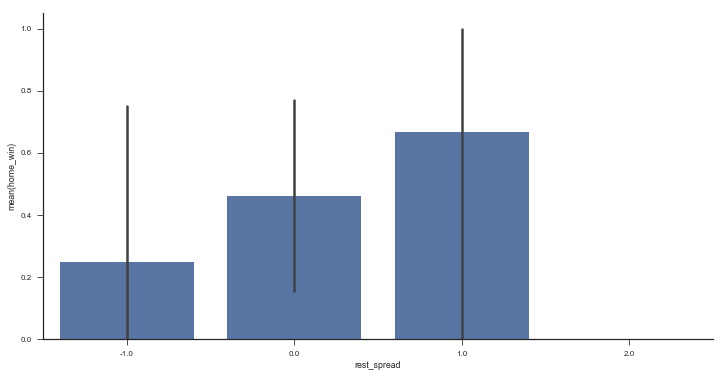

In [207]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='rest_spread', y='home_win', data=df.query('-3 <= rest_spread <= 3'),
            color='#4c72b0', ax=ax)
sns.despine()
# Plotting the win percent by rest difference

In [232]:
# Calculating the mean number of days of rest for each Home team and away team for each day
rest = (tidy.groupby(['date', 'variable'])
            .rest.mean()
            .dropna())
rest.head()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
Name: rest, dtype: float64

In [234]:
rest.unstack().head(10) # Calculating the mean number of days of rest for each Home team and away team for each day

variable,away_team,home_team
date,,
2015-10-28,0.000000,0.000000
2015-10-29,0.333333,0.000000
2015-10-30,1.083333,0.916667
2015-10-31,0.166667,0.833333


plotting the mean number of days of rest for each Home team and away team for each day

In [210]:
rest.unstack().stack() # Using stack and unstack for multiindexing to print the rest trend chart for away and home team

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
            home_team    0.916667
2015-10-31  away_team    0.166667
            home_team    0.833333
dtype: float64

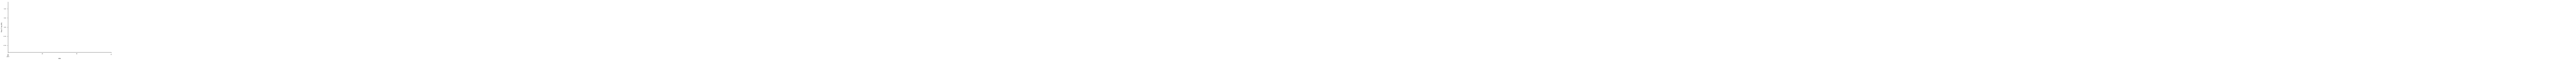

In [211]:

with sns.color_palette() as pal:
    b, g = pal.as_hex()[:2]

ax=(rest.unstack()
        .query('away_team < 7')
        .rolling(7)
        .mean()
        .plot(figsize=(12, 6), linewidth=3, legend=False))
ax.set(ylabel='Rest (7 day MA)')
ax.annotate("Home", (rest.index[-1][0], 1.02), color=g, size=14)
ax.annotate("Away", (rest.index[-1][0], 0.82), color=b, size=14)
sns.despine()

In [212]:
rest = (tidy.groupby(['date', 'variable'])
            .rest.mean()
            .dropna())
rest.head()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
Name: rest, dtype: float64

In [231]:
rest.unstack().head(10)

variable,away_team,home_team
date,,
2015-10-28,0.000000,0.000000
2015-10-29,0.333333,0.000000
2015-10-30,1.083333,0.916667
2015-10-31,0.166667,0.833333


In [214]:
rest.unstack().stack()

date        variable 
2015-10-28  away_team    0.000000
            home_team    0.000000
2015-10-29  away_team    0.333333
            home_team    0.000000
2015-10-30  away_team    1.083333
            home_team    0.916667
2015-10-31  away_team    0.166667
            home_team    0.833333
dtype: float64

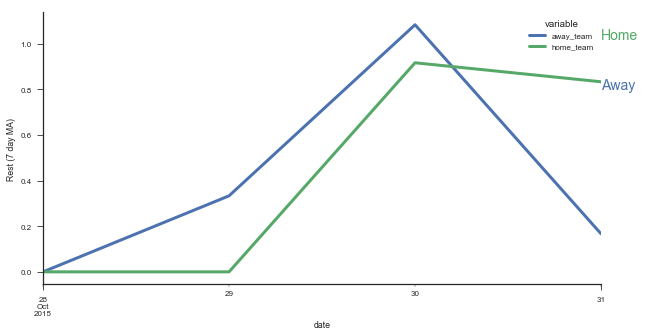

In [260]:
with sns.color_palette() as pal:
    b, g = pal.as_hex()[:2]

ax=(rest.unstack()
        .query('away_team < 5')
        .rolling(1)
        .mean()
        .plot(figsize=(10, 5), linewidth=3, legend=True))
ax.set(ylabel='Rest (7 day MA)')
ax.annotate("Home", (rest.index[-1][0], 1.02), color=g, size=14)
ax.annotate("Away", (rest.index[-1][0], 0.8), color=b, size=14)
sns.despine()